# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# data read and check

In [2]:
tr_data = pd.read_csv('input_train.csv', header = None)
te_data = pd.read_csv('input_test.csv', header = None)
tr_out = pd.read_csv('output_train.csv', header = None).T
te_out = pd.read_csv('output_test.csv', header = None).T

In [3]:
print('tr_data: ', tr_data.shape)
print(tr_data.head(5))

tr_data:  (10000, 10)
        0       1        2        3        4       5        6        7  \
0  2.3684  1.6903  4.31170  0.52393  0.58717  2.2496 -3.37850  0.49118   
1  6.3895  2.5794  1.69110 -1.45600 -0.81042 -1.3448  4.04220  0.96102   
2 -6.3071  5.4163  4.78110 -3.47890 -3.98270  3.1396  0.18474  1.64560   
3  3.3751  1.1903  0.97695 -3.58240 -1.19810  1.1052  4.15970  0.79441   
4  1.6893  2.0473  0.71852 -0.30018  0.16432  2.4130 -0.19138  1.10610   

          8         9  
0  1.842500 -0.187920  
1 -0.525610  0.673150  
2  0.013142  1.513400  
3  3.628500 -0.077304  
4  1.615200  0.159640  


In [4]:
tr_out.columns = ['target']
print('tr_out: ', tr_out.shape)
print(tr_out.head(5))

tr_out:  (10000, 1)
   target
0       0
1       0
2       0
3       0
4       0


In [5]:
print('te_data: ', te_data.shape)
print(te_data.head(5))

te_data:  (4000, 10)
        0        1       2       3        4        5        6        7  \
0 -2.5572  2.79390  2.5773  4.9452 -2.35310  0.52966 -0.84490  1.08140   
1  2.1543  0.39992  5.8832  3.4851  0.36115  0.30460  0.70946  0.91388   
2  1.5780  0.80247  3.3155 -2.0784 -3.50340 -0.12445  5.20190  1.33170   
3  4.8611  1.77000  1.0196  2.5818 -1.64970  0.56268 -3.79790  1.42320   
4  1.8811  1.63840  1.5200 -3.0686 -2.32640 -2.45580  0.13828  1.35490   

         8        9  
0 -0.25236  1.36760  
1  4.56100  0.73946  
2  1.45320  1.57100  
3  3.13860  0.20110  
4  4.62500  0.39006  


In [6]:
te_out.columns = ['target']
print('te_out: ', te_out.shape)
print(te_out.head(5))

te_out:  (4000, 1)
   target
0       0
1       0
2       0
3       0
4       0


# 결측치 확인

In [7]:
tr_data.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [8]:
te_data.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

# Input data type check

In [9]:
tr_data.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
9    float64
dtype: object

In [10]:
te_data.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
9    float64
dtype: object

# check output nums

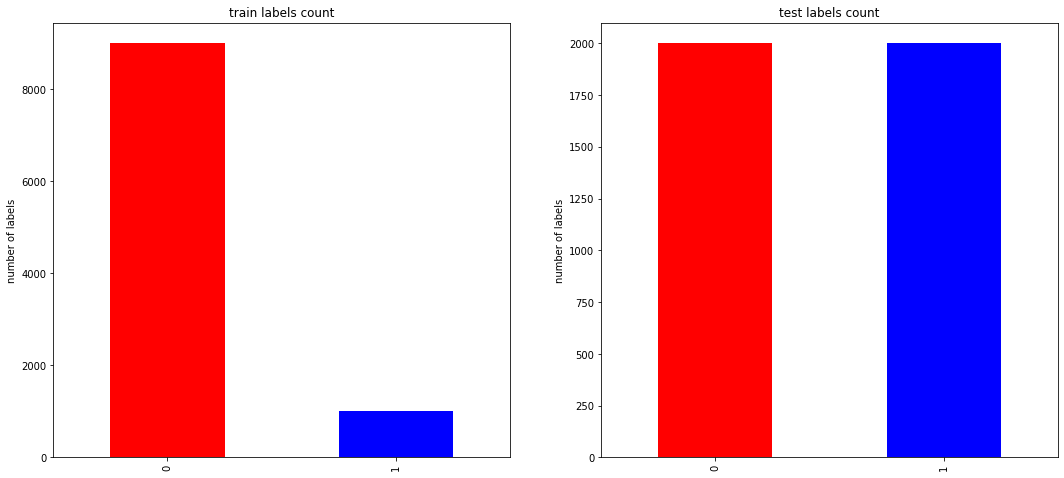

In [11]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
tr_out['target'].value_counts().plot.bar(ax = ax[0], color = ['red', 'blue'])
ax[0].set_title('train labels count')
ax[0].set_ylabel('number of labels')
te_out['target'].value_counts().plot.bar(ax = ax[1], color = ['red', 'blue'])
ax[1].set_title('test labels count')
ax[1].set_ylabel('number of labels')
plt.show()

In [12]:
print('-----train labels count-----')
print(tr_out['target'].value_counts())
print('-----test labels count-----')
print(te_out['target'].value_counts())

-----train labels count-----
0    9000
1    1000
Name: target, dtype: int64
-----test labels count-----
0    2000
1    2000
Name: target, dtype: int64


# Check distribution of train data by labels

In [13]:
train = pd.concat([tr_data, tr_out], axis = 1)
test = pd.concat([te_data, te_out], axis = 1)

<Figure size 432x288 with 0 Axes>

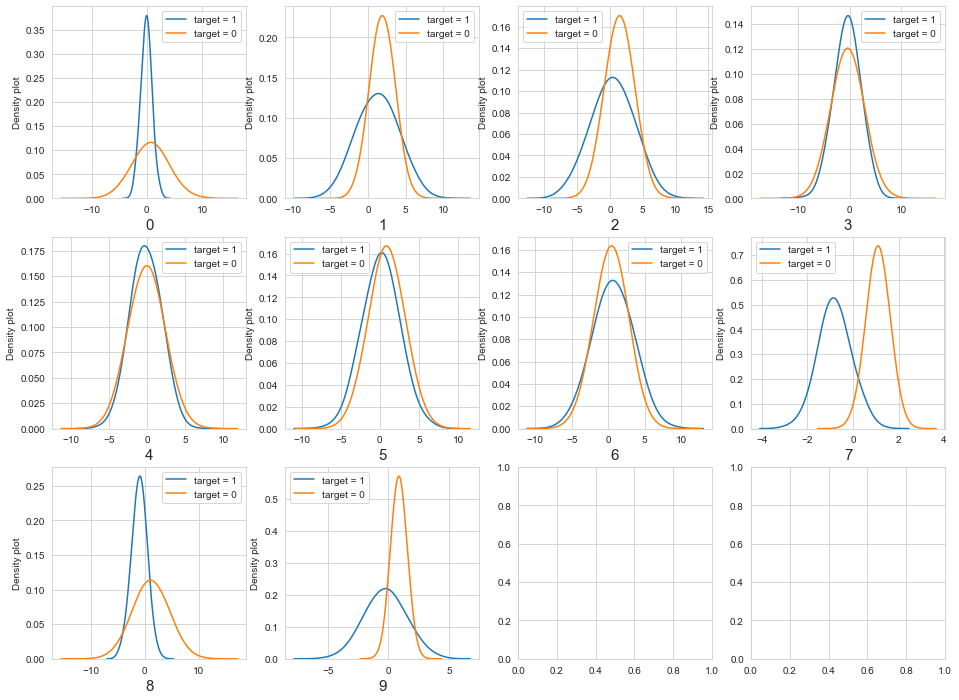

In [14]:
tr_1 = train.loc[train['target'] != 0]
tr_0 = train.loc[train['target'] == 0]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(3, 4, figsize = (16, 12))

plot_cnt = 0
for feature in train.columns[:-1]:
    plot_cnt += 1
    plt.subplot(3, 4, plot_cnt)
    sns.kdeplot(tr_1[feature], bw = 0.5, label = "target=1")
    sns.kdeplot(tr_0[feature], bw = 0.5, label = "target=0")
    plt.ylabel('Density plot')
    plt.xlabel(feature, fontsize = 15)
    plt.legend(['target = 1', 'target = 0'])
plt.show()

## calculate metric function

In [15]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

def metric_scores(original, prediction):
    
    results = []
    
    accuracy = accuracy_score(original, prediction)
    recall = recall_score(original, prediction)
    precision = precision_score(original, prediction)

    results.append(round(accuracy*100, 2))
    results.append(round(recall*100, 2))
    results.append(round(precision*100, 2))
        
    return results

## inference function

In [16]:
def inference(model, x_train, y_train, x_test):
    model.fit(x_train, y_train)
    
    prediction = model.predict(x_test)
    
    return prediction

# -----Before sampling unbalanced data-----

# prepare for train

In [17]:
x_train = train.drop(['target'], axis = 1)
y_train = train['target']
x_test = test.drop(['target'], axis = 1)
y_test = test['target']

# import model libraries

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

model_dict = {}

In [51]:
RFC = RandomForestClassifier()
prediction = inference(RFC, x_train, y_train, x_test)
results = metric_scores(y_test, prediction)

model_dict['random_forest']= results

In [52]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
prediction = inference(model, x_train, y_train, x_test)
results = metric_scores(y_test, prediction)

model_dict['rbf-svc']= results

In [53]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
prediction = inference(model, x_train, y_train, x_test)
results = metric_scores(y_test, prediction)

model_dict['linear-svc']= results

In [54]:
model = LogisticRegression()
prediction = inference(model, x_train, y_train, x_test)
results = metric_scores(y_test, prediction)

model_dict['logistic']= results

In [55]:
model=DecisionTreeClassifier()
prediction = inference(model, x_train, y_train, x_test)
results = metric_scores(y_test, prediction)

model_dict['tree']= results

In [56]:
model=GaussianNB()
prediction = inference(model, x_train, y_train, x_test)
results = metric_scores(y_test, prediction)

model_dict['gaussianNB']= results

In [58]:
scores = pd.DataFrame(model_dict).T
scores.columns = ['accuracy', 'recall', 'precision']
scores

,accuracy,recall,precision
random_forest,95.20,90.75,99.62
rbf-svc,86.92,74.05,99.73
linear-svc,93.38,86.90,99.83
logistic,93.80,87.75,99.83
tree,93.78,88.95,98.45
gaussianNB,96.78,94.05,99.47


# -----After under sample unbalanced data-----

# TomekLinks

In [59]:
from collections import Counter
from imblearn.under_sampling import TomekLinks

Tomek = TomekLinks(sampling_strategy = 'majority')

x_tl, y_tl = Tomek.fit_resample(x_train, y_train)

print(Counter(y_tl))

model_dict = {}

RFC = RandomForestClassifier()
prediction = inference(RFC, x_tl, y_tl, x_test)
results = metric_scores(y_test, prediction)

model_dict['random_forest']= results

model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
prediction = inference(model, x_tl, y_tl, x_test)
results = metric_scores(y_test, prediction)

model_dict['rbf-svc']= results

model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
prediction = inference(model, x_tl, y_tl, x_test)
results = metric_scores(y_test, prediction)

model_dict['linear-svc']= results

model = LogisticRegression()
prediction = inference(model, x_tl, y_tl, x_test)
results = metric_scores(y_test, prediction)

model_dict['logistic']= results

model=DecisionTreeClassifier()
prediction = inference(model, x_tl, y_tl, x_test)
results = metric_scores(y_test, prediction)

model_dict['tree']= results

model=GaussianNB()
prediction = inference(model, x_tl, y_tl, x_test)
results = metric_scores(y_test, prediction)

model_dict['gaussianNB']= results

scores = pd.DataFrame(model_dict).T
scores.columns = ['accuracy', 'recall', 'precision']
scores

Counter({0: 8939, 1: 1000})


,accuracy,recall,precision
random_forest,95.32,91.05,99.56
rbf-svc,87.22,74.65,99.73
linear-svc,93.58,87.30,99.83
logistic,94.02,88.20,99.83
tree,93.90,88.80,98.89
gaussianNB,96.80,94.15,99.42


# CNN (condensed nearest neighbor)

In [60]:
from collections import Counter
from imblearn.under_sampling import CondensedNearestNeighbour

undersample = CondensedNearestNeighbour(n_neighbors = 1)

x_tl, y_tl = undersample.fit_resample(x_train, y_train)

print(Counter(y_tl))

model_dict = {}

RFC = RandomForestClassifier()
prediction = inference(RFC, x_tl, y_tl, x_test)
results = metric_scores(y_test, prediction)

model_dict['random_forest']= results

model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
prediction = inference(model, x_tl, y_tl, x_test)
results = metric_scores(y_test, prediction)

model_dict['rbf-svc']= results

model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
prediction = inference(model, x_tl, y_tl, x_test)
results = metric_scores(y_test, prediction)

model_dict['linear-svc']= results

model = LogisticRegression()
prediction = inference(model, x_tl, y_tl, x_test)
results = metric_scores(y_test, prediction)

model_dict['logistic']= results

model=DecisionTreeClassifier()
prediction = inference(model, x_tl, y_tl, x_test)
results = metric_scores(y_test, prediction)

model_dict['tree']= results

model=GaussianNB()
prediction = inference(model, x_tl, y_tl, x_test)
results = metric_scores(y_test, prediction)

model_dict['gaussianNB']= results

scores = pd.DataFrame(model_dict).T
scores.columns = ['accuracy', 'recall', 'precision']
scores

Counter({1: 1000, 0: 988})


,accuracy,recall,precision
random_forest,96.60,93.90,99.26
rbf-svc,94.10,88.85,99.27
linear-svc,95.35,91.50,99.13
logistic,95.75,92.35,99.09
tree,94.52,91.90,96.99
gaussianNB,97.10,94.75,99.42


# -----After over sample unbalanced data-----

# Resampling

In [68]:
from sklearn.utils import resample

x_upsampled, y_upsampled = resample(x_train[y_train == 1], y_train[y_train==1],
                                    n_samples = 8000, random_state=123)
y_upsampled.value_counts()

1    8000
Name: target, dtype: int64

In [69]:
x_up = pd.concat([x_train, x_upsampled], axis = 0)
y_up = pd.concat([y_train, y_upsampled], axis = 0)

print("new data: ", x_up.shape)
print("new labels: ", y_up.shape)
print("label counts: ", Counter(y_up))

new data:  (18000, 10)
new labels:  (18000,)
label counts:  Counter({0: 9000, 1: 9000})


In [63]:
model_dict = {}

RFC = RandomForestClassifier()
prediction = inference(RFC, x_up, y_up, x_test)
results = metric_scores(y_test, prediction)

model_dict['random_forest']= results

model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
prediction = inference(model, x_up, y_up, x_test)
results = metric_scores(y_test, prediction)

model_dict['rbf-svc']= results

model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
prediction = inference(model, x_up, y_up, x_test)
results = metric_scores(y_test, prediction)

model_dict['linear-svc']= results

model = LogisticRegression()
prediction = inference(model, x_up, y_up, x_test)
results = metric_scores(y_test, prediction)

model_dict['logistic']= results

model=DecisionTreeClassifier()
prediction = inference(model, x_up, y_up, x_test)
results = metric_scores(y_test, prediction)

model_dict['tree']= results

model=GaussianNB()
prediction = inference(model, x_up, y_up, x_test)
results = metric_scores(y_test, prediction)

model_dict['gaussianNB']= results

new_scores = pd.DataFrame(model_dict).T
new_scores.columns = ['accuracy', 'recall', 'precision']
new_scores

,accuracy,recall,precision
random_forest,95.98,92.55,99.36
rbf-svc,89.32,79.00,99.56
linear-svc,96.00,94.90,97.03
logistic,95.88,94.85,96.84
tree,93.22,87.20,99.15
gaussianNB,98.15,97.75,98.54


# SMOTE (synthetic minority oversampling technique)

In [66]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
x_up, y_up = sm.fit_resample(x_train, y_train)

print(Counter(y_up))

Counter({0: 9000, 1: 9000})


In [67]:
model_dict = {}

RFC = RandomForestClassifier()
prediction = inference(RFC, x_up, y_up, x_test)
results = metric_scores(y_test, prediction)

model_dict['random_forest']= results

model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
prediction = inference(model, x_up, y_up, x_test)
results = metric_scores(y_test, prediction)

model_dict['rbf-svc']= results

model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
prediction = inference(model, x_up, y_up, x_test)
results = metric_scores(y_test, prediction)

model_dict['linear-svc']= results

model = LogisticRegression()
prediction = inference(model, x_up, y_up, x_test)
results = metric_scores(y_test, prediction)

model_dict['logistic']= results

model=DecisionTreeClassifier()
prediction = inference(model, x_up, y_up, x_test)
results = metric_scores(y_test, prediction)

model_dict['tree']= results

model=GaussianNB()
prediction = inference(model, x_up, y_up, x_test)
results = metric_scores(y_test, prediction)

model_dict['gaussianNB']= results

new_scores = pd.DataFrame(model_dict).T
new_scores.columns = ['accuracy', 'recall', 'precision']
new_scores

,accuracy,recall,precision
random_forest,96.80,94.50,99.06
rbf-svc,89.40,79.20,99.50
linear-svc,95.88,93.95,97.71
logistic,95.78,93.95,97.51
tree,94.95,91.75,98.02
gaussianNB,97.88,96.85,98.88


# final results
## resampled (label =1) data + original data
- total num of data : 18000
- GaussianNB

In [73]:
from sklearn.utils import resample

x_upsampled, y_upsampled = resample(x_train[y_train == 1], y_train[y_train==1],
                                    n_samples = 8000, random_state=123)
y_upsampled.value_counts()

x_up = pd.concat([x_train, x_upsampled], axis = 0)
y_up = pd.concat([y_train, y_upsampled], axis = 0)

print("new data: ", x_up.shape)
print("new labels: ", y_up.shape)
print("label counts: ", Counter(y_up))

model=GaussianNB()
prediction = inference(model, x_up, y_up, x_test)
print('results: ', metric_scores(y_test, prediction))

final = pd.DataFrame(prediction)

final.to_csv('output_test_sejong.csv', header = None, index = False)

new data:  (18000, 10)
new labels:  (18000,)
label counts:  Counter({0: 9000, 1: 9000})
results:  [98.15, 97.75, 98.54]
